In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17473536/17464789 [==============================] - 0s 0us/step


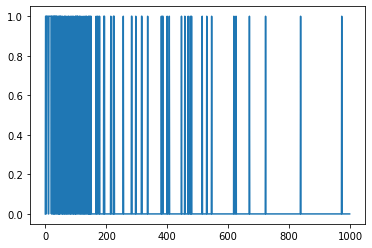

In [3]:
plt.plot(train_data[0])

In [8]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                16016     
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5788 - accuracy: 0.7144 - binary_crossentropy: 0.5788 - val_loss: 0.4441 - val_accuracy: 0.8178 - val_binary_crossentropy: 0.4441 - 1s/epoch - 28ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3760 - accuracy: 0.8438 - binary_crossentropy: 0.3760 - val_loss: 0.3493 - val_accuracy: 0.8523 - val_binary_crossentropy: 0.3493 - 363ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3242 - accuracy: 0.8644 - binary_crossentropy: 0.3242 - val_loss: 0.3337 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3337 - 406ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3094 - accuracy: 0.8719 - binary_crossentropy: 0.3094 - val_loss: 0.3264 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3264 - 405ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3003 - accuracy: 0.8751 - binary_crossentropy: 0.3003 - val_loss: 0.3277 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3277 - 412ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2945 - accuracy: 0.8775 - binary_cr

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 4004      
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6628 - accuracy: 0.6718 - binary_crossentropy: 0.6628 - val_loss: 0.6182 - val_accuracy: 0.7770 - val_binary_crossentropy: 0.6182 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5639 - accuracy: 0.8045 - binary_crossentropy: 0.5639 - val_loss: 0.5146 - val_accuracy: 0.8145 - val_binary_crossentropy: 0.5146 - 345ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4659 - accuracy: 0.8313 - binary_crossentropy: 0.4659 - val_loss: 0.4341 - val_accuracy: 0.8327 - val_binary_crossentropy: 0.4341 - 327ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3999 - accuracy: 0.8443 - binary_crossentropy: 0.3999 - val_loss: 0.3870 - val_accuracy: 0.8442 - val_binary_crossentropy: 0.3870 - 329ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3624 - accuracy: 0.8543 - binary_crossentropy: 0.3624 - val_loss: 0.3618 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.3618 - 371ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3408 - accuracy: 0.8618 - binary_cr

In [12]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               512512    
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.4312 - accuracy: 0.7999 - binary_crossentropy: 0.4312 - val_loss: 0.3484 - val_accuracy: 0.8504 - val_binary_crossentropy: 0.3484 - 4s/epoch - 78ms/step
Epoch 2/20
49/49 - 3s - loss: 0.2907 - accuracy: 0.8787 - binary_crossentropy: 0.2907 - val_loss: 0.3247 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3247 - 3s/epoch - 70ms/step
Epoch 3/20
49/49 - 3s - loss: 0.2310 - accuracy: 0.9068 - binary_crossentropy: 0.2310 - val_loss: 0.3352 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3352 - 3s/epoch - 67ms/step
Epoch 4/20
49/49 - 3s - loss: 0.1172 - accuracy: 0.9624 - binary_crossentropy: 0.1172 - val_loss: 0.3992 - val_accuracy: 0.8502 - val_binary_crossentropy: 0.3992 - 3s/epoch - 54ms/step
Epoch 5/20
49/49 - 3s - loss: 0.0281 - accuracy: 0.9955 - binary_crossentropy: 0.0281 - val_loss: 0.5242 - val_accuracy: 0.8490 - val_binary_crossentropy: 0.5242 - 3s/epoch - 54ms/step
Epoch 6/20
49/49 - 3s - loss: 0.0051 - accuracy: 0.9998 - binary_crossentro

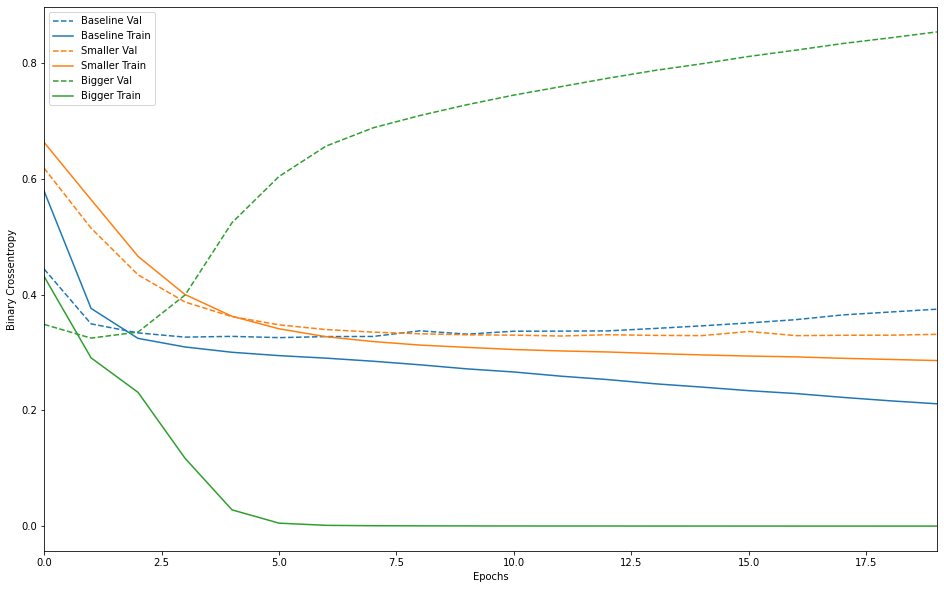

In [15]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [16]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6460 - accuracy: 0.6930 - binary_crossentropy: 0.6035 - val_loss: 0.5043 - val_accuracy: 0.8104 - val_binary_crossentropy: 0.4642 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4258 - accuracy: 0.8428 - binary_crossentropy: 0.3853 - val_loss: 0.3898 - val_accuracy: 0.8535 - val_binary_crossentropy: 0.3488 - 408ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3662 - accuracy: 0.8669 - binary_crossentropy: 0.3255 - val_loss: 0.3725 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3324 - 364ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3519 - accuracy: 0.8714 - binary_crossentropy: 0.3125 - val_loss: 0.3698 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3310 - 402ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3444 - accuracy: 0.8736 - binary_crossentropy: 0.3064 - val_loss: 0.3647 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3275 - 439ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3389 - accuracy: 0.8754 - binary_cr

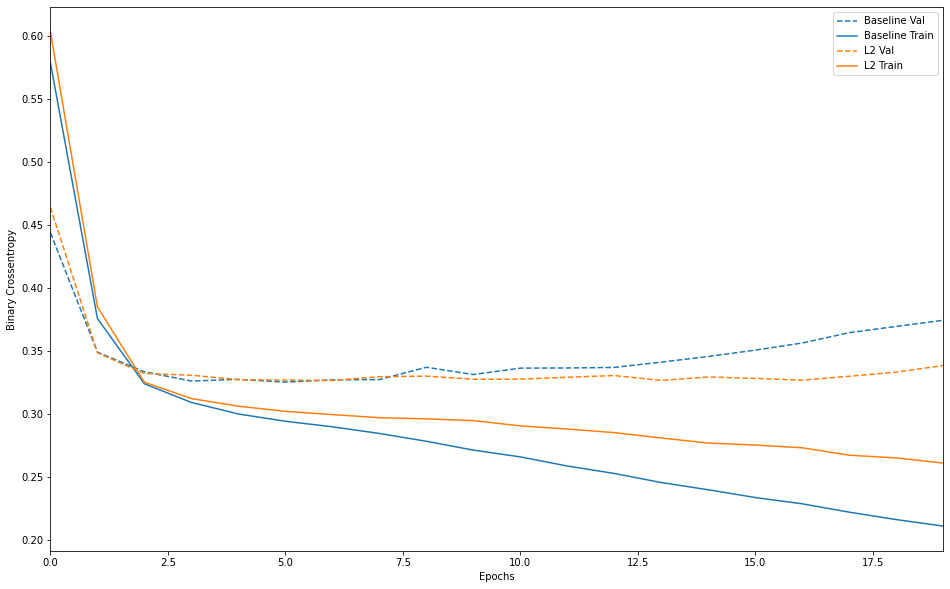

In [17]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [18]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6909 - accuracy: 0.5422 - binary_crossentropy: 0.6909 - val_loss: 0.6690 - val_accuracy: 0.7130 - val_binary_crossentropy: 0.6690 - 2s/epoch - 41ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6316 - accuracy: 0.6477 - binary_crossentropy: 0.6316 - val_loss: 0.5553 - val_accuracy: 0.8099 - val_binary_crossentropy: 0.5553 - 400ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5351 - accuracy: 0.7432 - binary_crossentropy: 0.5351 - val_loss: 0.4319 - val_accuracy: 0.8421 - val_binary_crossentropy: 0.4319 - 417ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4629 - accuracy: 0.7979 - binary_crossentropy: 0.4629 - val_loss: 0.3641 - val_accuracy: 0.8533 - val_binary_crossentropy: 0.3641 - 395ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4137 - accuracy: 0.8282 - binary_crossentropy: 0.4137 - val_loss: 0.3413 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3413 - 416ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3938 - accuracy: 0.8382 - binary_cr

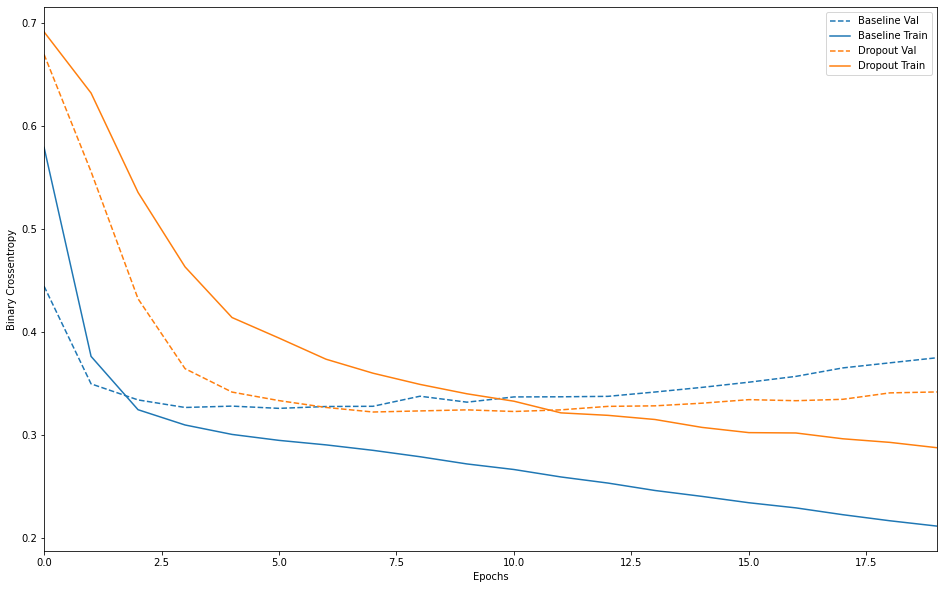

In [19]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])